### About Project

We will to apply Time Series FB-Prophet to build model to predict and forecast the sales of furniture for the next one year i.e. predict future values based on previously observed values. We have a 4-year furniture sales data.

### About Data

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

This dataset consists of daily sales data of various products at a superstore.

### Installing Prophet

%pip install prophet

pip install pystan

pip install fbprophet

pip install pystan==2.19.1.1 prophet

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)  

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### 2.Importing the table

In [4]:
furniture=pd.read_csv("Super_Store.csv",sep=',',encoding="cp1252")
print(furniture.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

#### 3.Describing data

In [5]:
print("Data Description")
print(furniture.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(furniture.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(furniture.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  
-----------------------------------------------------------------------------------------------
Number of rows and col

In [6]:
print("Data percentaile")
print(furniture.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(furniture.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
1%       87.600000   2058.000000     4.928000     1.000000     0.000000   
2%      203.200000   2920.000000     6.315200     1.000000     0.000000   
3%      295.600000   6458.800000     7.984800     1.000000     0.000000   
4%      412.200000   7601.000000     8.952000     1.000000     0.000000   
5%      495.000000  10009.000000    10.020000     1.000000     0.000000   
6%      599.200000  10009.000000    12.082400     1.000000     0.000000   
7%      706.000000  10011.000000    13.960000     1.000000     0.000000   
8%      800.600000  10011.000000    14.760000     1.000000     0.000000   
9%      

## EDA process

In [7]:
furniture=furniture.loc[:,['Order Date','Sales']]

In [8]:
print(furniture.head())

   Order Date      Sales
0   11/8/2016   261.9600
1   11/8/2016   731.9400
2  10/11/2015   957.5775
3    6/9/2014    48.8600
4    6/9/2014  1706.1840


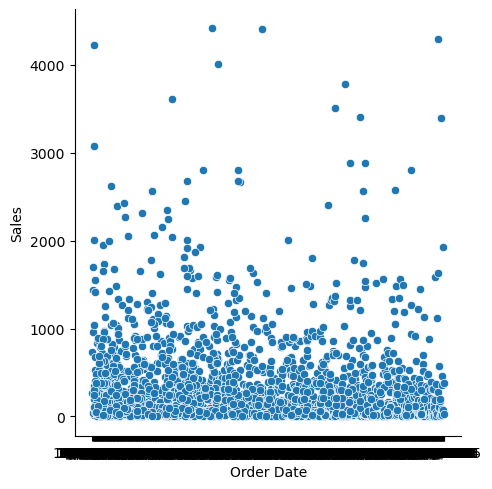

In [9]:
sns.relplot(data=furniture,x="Order Date",y="Sales")
plt.show()

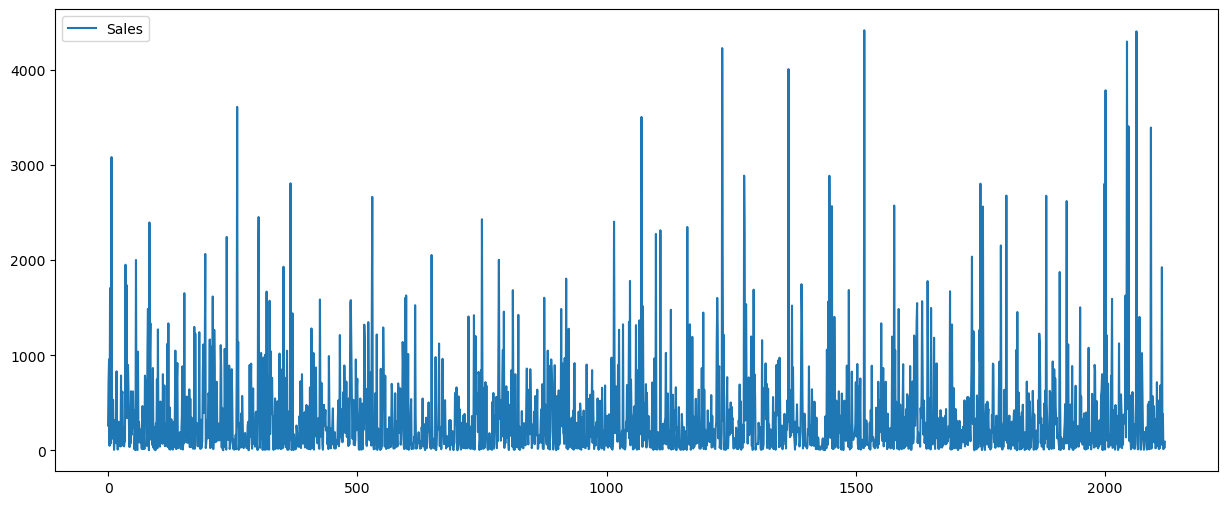

In [10]:
furniture.plot(figsize=(15,6))
plt.show()

In [11]:
furniture["Order Date"] = pd.to_datetime(furniture["Order Date"])

In [13]:
furniture = furniture.sort_values('Order Date')

In [14]:
print(furniture.head())

     Order Date     Sales
1577 2014-01-06  2573.820
1626 2014-01-07    76.728
181  2014-01-10    51.940
150  2014-01-11     9.940
631  2014-01-13   545.940


In [15]:
print(furniture.columns)

Index(['Order Date', 'Sales'], dtype='object')


In [16]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [17]:
furniture = furniture.groupby('ds')['y'].sum().reset_index()

In [18]:
print(furniture.head())

          ds         y
0 2014-01-06  2573.820
1 2014-01-07    76.728
2 2014-01-10    51.940
3 2014-01-11     9.940
4 2014-01-13   879.939


In [19]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      889 non-null    datetime64[ns]
 1   y       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


## Predection

In [20]:
from prophet import Prophet

In [21]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      889 non-null    datetime64[ns]
 1   y       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [22]:
print(furniture.shape)

(889, 2)


#### 1.Training model

In [23]:
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

09:52:45 - cmdstanpy - INFO - Chain [1] start processing
09:52:46 - cmdstanpy - INFO - Chain [1] done processing


#### 2.Creating test dates and predecting them

In [24]:
future_dates=furniture_model.make_future_dataframe(periods=365)

In [25]:
print(future_dates)

             ds
0    2014-01-06
1    2014-01-07
2    2014-01-10
3    2014-01-11
4    2014-01-13
...         ...
1249 2018-12-26
1250 2018-12-27
1251 2018-12-28
1252 2018-12-29
1253 2018-12-30

[1254 rows x 1 columns]


In [26]:
prediction=furniture_model.predict(future_dates)

In [27]:
print(prediction.head())

          ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2014-01-06  743.609821  -864.026738  2855.068653   743.609821   743.609821   
1 2014-01-07  743.635824 -1360.368066  2411.971043   743.635824   743.635824   
2 2014-01-10  743.713833 -1173.095852  2638.317732   743.713833   743.713833   
3 2014-01-11  743.739836 -1598.633663  2401.050428   743.739836   743.739836   
4 2014-01-13  743.791841 -1081.800343  2645.600598   743.791841   743.791841   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      152.998742            152.998742            152.998742  234.608709   
1     -250.973085           -250.973085           -250.973085 -140.630269   
2      -97.593835            -97.593835            -97.593835   93.158606   
3     -328.583590           -328.583590           -328.583590 -113.513734   
4      -24.323422            -24.323422            -24.323422  234.608709   

   weekly_lower  weekly_upper      yearly  yearly_lower 

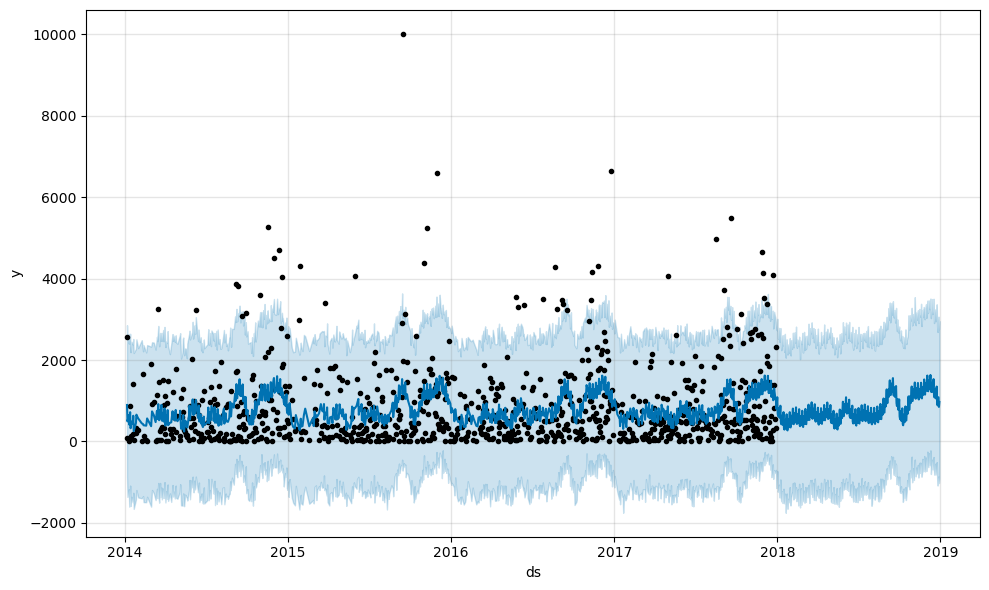

In [28]:
### plot the predicted projection
furniture_model.plot(prediction)

#### Visualize Each Components[Trends,yearly]

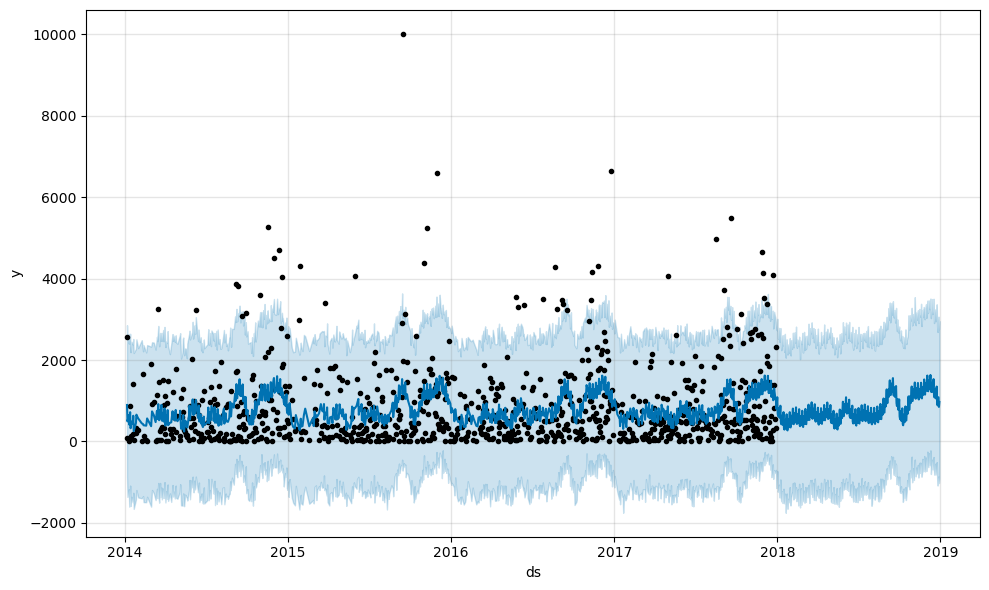

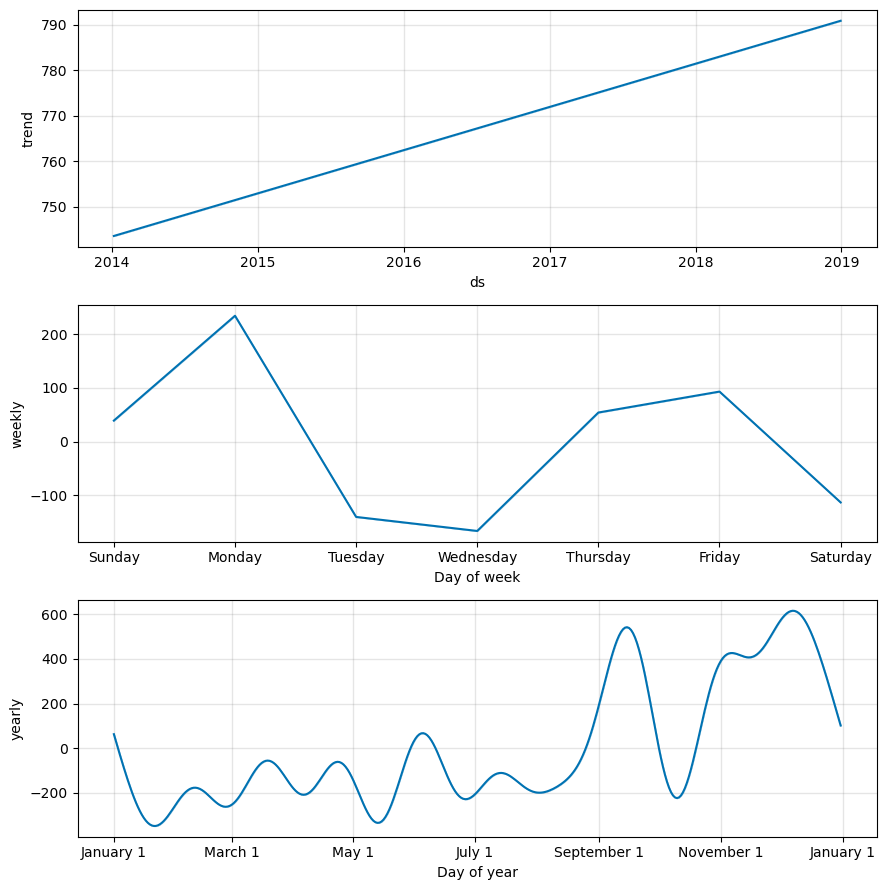

In [29]:
furniture_model.plot_components(prediction)
plt.show()

#### Valudating our madel

In [30]:
from prophet.diagnostics import cross_validation

In [31]:
df_cv = cross_validation(furniture_model, initial='730 days', period='180 days', horizon = '365 days')
print(df_cv.head())

  0%|          | 0/2 [00:00<?, ?it/s]

09:52:50 - cmdstanpy - INFO - Chain [1] start processing
09:52:50 - cmdstanpy - INFO - Chain [1] done processing
09:52:51 - cmdstanpy - INFO - Chain [1] start processing
09:52:52 - cmdstanpy - INFO - Chain [1] done processing


          ds        yhat   yhat_lower   yhat_upper         y     cutoff
0 2016-07-04  740.964495 -1152.933737  2626.113076  1329.965 2016-07-03
1 2016-07-07  655.569275 -1268.962912  2416.178763   817.278 2016-07-03
2 2016-07-08  588.798753 -1282.294812  2356.023725   662.880 2016-07-03
3 2016-07-09  395.885639 -1472.079189  2107.311325   573.286 2016-07-03
4 2016-07-14  746.473164 -1135.940935  2557.207854   661.686 2016-07-03


In [32]:
from prophet.diagnostics import performance_metrics

In [33]:
df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon            mse        rmse         mae      mape     mdape  \
0 49 days  684449.566634  827.314672  536.511887  7.557193  0.947124   
1 50 days  681944.505432  825.799313  534.148214  7.644101  1.115344   
2 51 days  687398.043348  829.094713  544.571796  7.868661  1.354507   
3 52 days  687911.493058  829.404300  545.890520  7.874232  1.354507   
4 54 days  842360.980373  917.802256  600.007321  7.889040  1.354507   

      smape  coverage  
0  0.934835      0.96  
1  0.951673      0.96  
2  0.991341      0.96  
3  0.994645      0.96  
4  1.021973      0.94  


In [34]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Conclusion :-
Good to see that the sales for furniture  have been linearly increasing over time although and the growth seems slightly stronger.

The worst month for furniture is April. The best month for furniture is December, and the best month for office supplies is November.

There are many time-series analysis we can explore from now on, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. We have only scratched the surface here. Stay tuned for future works on time-series analysis.